# Regression

## Introduction

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years.

## Data Description

Country : Country

Year : Year

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population

Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years) 

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)


### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

### Read the dataset into DataFrame 

In [4]:
df = pd.read_csv("C:/Users/PURUSHOTHAMAN MURVAS/Downloads/AML/Project/Life Expectancy Data_afterNull.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,NaN,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2919 non-null float64
Adult Mortality                    2912 non-null float64
infant deaths                      2916 non-null float64
Alcohol                            2744 non-null float64
percentage expenditure             2816 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2840 non-null float64
 BMI                               2837 non-null float64
under-five deaths                  2913 non-null float64
Polio                              2859 non-null float64
Total expenditure                  2691 non-null float64
Diphtheria                         2842 non-null float64
 HIV/AIDS                          2885 no

### We need to strip the features names

In [6]:
df.columns = df.columns[:].str.strip() #strip removes both start and end
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2919 non-null float64
Adult Mortality                    2912 non-null float64
infant deaths                      2916 non-null float64
Alcohol                            2744 non-null float64
percentage expenditure             2816 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2840 non-null float64
BMI                                2837 non-null float64
under-five deaths                  2913 non-null float64
Polio                              2859 non-null float64
Total expenditure                  2691 non-null float64
Diphtheria                         2842 non-null float64
HIV/AIDS                           2885 no

### To find the null values in the dataset

In [8]:
df.isna().sum().sum()

3321

### Data PreProcessing

In [9]:
print("Alcohol                         : ",df['Alcohol'].isna().sum())
print("Hepatitis B                     : ",df['Hepatitis B'].isna().sum())
print("BMI                             : ",df['BMI'].isna().sum())
print("Polio                           : ",df['Polio'].isna().sum())
print("Life expectancy                 : ",df['Life expectancy'].isna().sum())
print("percentage expenditure          : ",df['percentage expenditure'].isna().sum())
print("Measles                         : ",df['Measles'].isna().sum())
print("under-five deaths               : ",df['under-five deaths'].isna().sum())
print("Total expenditure               : ",df['Total expenditure'].isna().sum())
print("Diphtheria                      : ",df['Diphtheria'].isna().sum())
print("HIV/AIDS                        : ",df['HIV/AIDS'].isna().sum())
print("GDP                             : ",df['GDP'].isna().sum())
print("Population                      : ",df['Population'].isna().sum())
print("thinness  1-19 years            : ",df['thinness  1-19 years'].isna().sum())
print("thinness 5-9 years              : ",df['thinness 5-9 years'].isna().sum())
print("Income composition of resources : ",df['Income composition of resources'].isna().sum())
print("Schooling                       : ",df['Schooling'].isna().sum())
print("infant deaths                   : ",df['infant deaths'].isna().sum())
print("Adult Mortality                 : ",df['Adult Mortality'].isna().sum())

Alcohol                         :  194
Hepatitis B                     :  553
BMI                             :  101
Polio                           :  79
Life expectancy                 :  19
percentage expenditure          :  122
Measles                         :  98
under-five deaths               :  25
Total expenditure               :  247
Diphtheria                      :  96
HIV/AIDS                        :  53
GDP                             :  468
Population                      :  675
thinness  1-19 years            :  67
thinness 5-9 years              :  46
Income composition of resources :  195
Schooling                       :  235
infant deaths                   :  22
Adult Mortality                 :  26


### Replacing the null values

In [10]:
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)
df['Life expectancy'].fillna(df['Life expectancy'].mean(), inplace=True)
df['percentage expenditure'].fillna(df['percentage expenditure'].mean(),inplace=True)
df['Measles'].fillna(df['Measles'].mean(),inplace=True)
df['under-five deaths'].fillna(df['under-five deaths'].mean(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(),inplace=True)
df['Diphtheria'].fillna(df['Diphtheria'].mean(),inplace=True)
df['HIV/AIDS'].fillna(df['HIV/AIDS'].mean(),inplace=True)
df['GDP'].fillna(df['GDP'].mean(),inplace=True)
df['Population'].fillna(df['Population'].mean(),inplace=True)
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean(),inplace=True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean(),inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(),inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(),inplace=True)
df['infant deaths'].fillna(df['infant deaths'].mode()[0],inplace=True)

In [11]:
df.isna().sum().sum()

0

## Exploratory Data Analysis

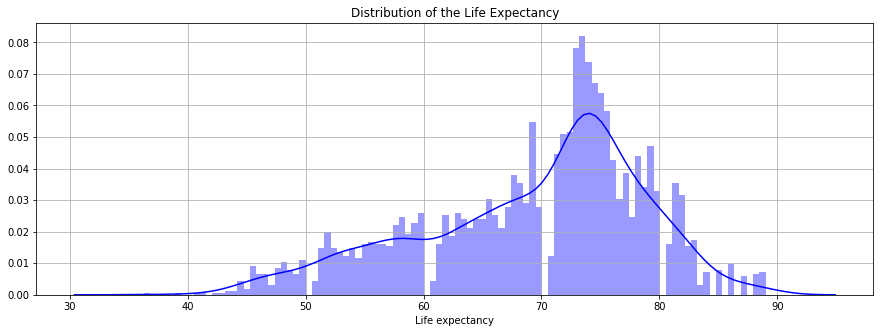

In [146]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title("Distribution of the Life Expectancy")
sns.distplot(df['Life expectancy'],color='b',bins=100,hist_kws={'alpha':0.4})

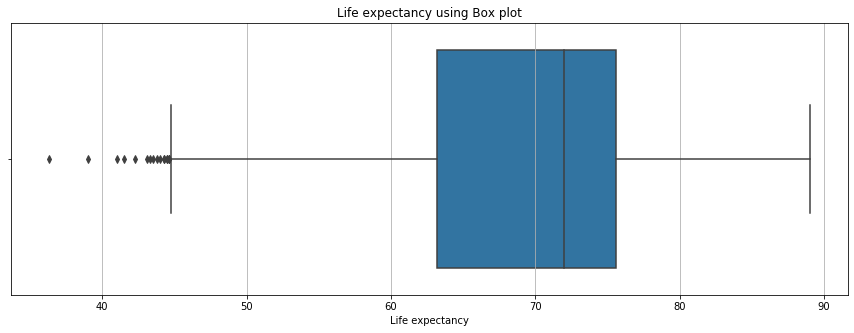

In [147]:
plt.figure(figsize=(15,5))
plt.title("Life expectancy using Box plot")
plt.grid()
sns.boxplot(x=df['Life expectancy'])

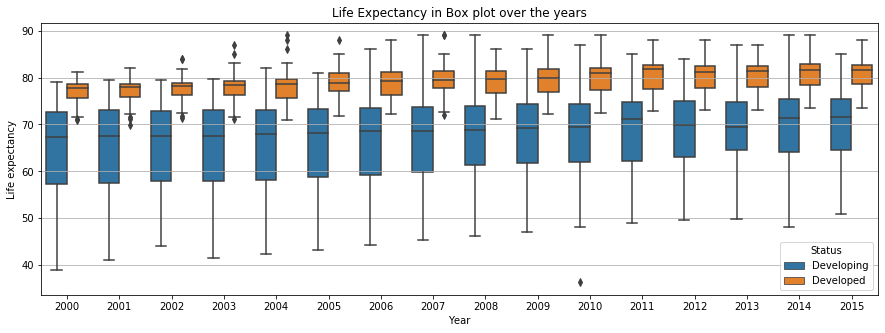

In [148]:
plt.figure(figsize=(15,5))
plt.title("Life Expectancy in Box plot over the years")
plt.grid()
sns.boxplot(x="Year", y="Life expectancy", hue = 'Status', data=df)

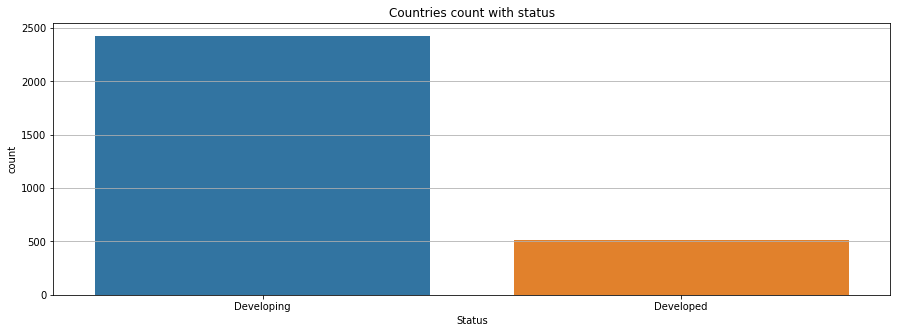

In [39]:
plt.figure(figsize=(15,5))
plt.title("Countries count with status")
plt.grid()
sns.countplot(x=df['Status'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C21B1B908>,
      dtype=object)

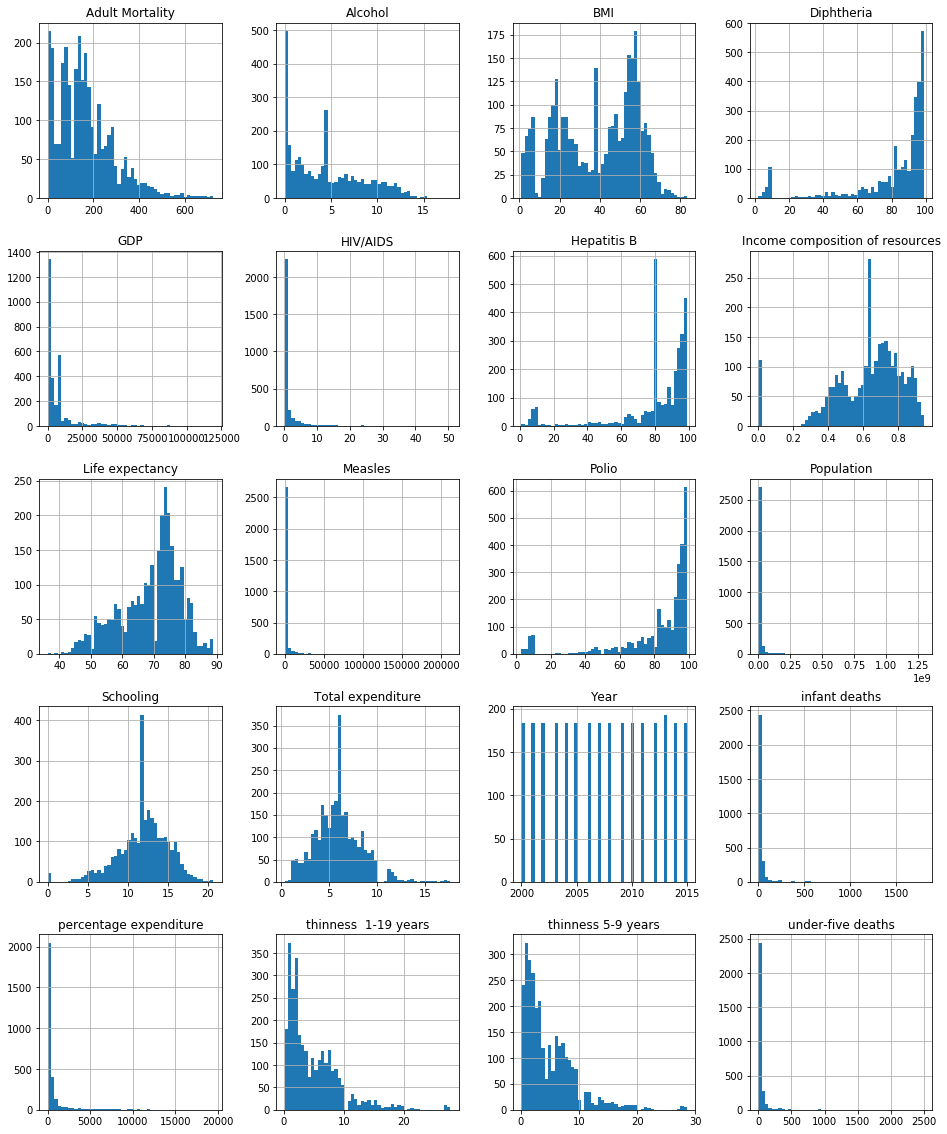

In [33]:
df.hist(figsize=(16,20),bins=50,xlabelsize=10,ylabelsize=10)

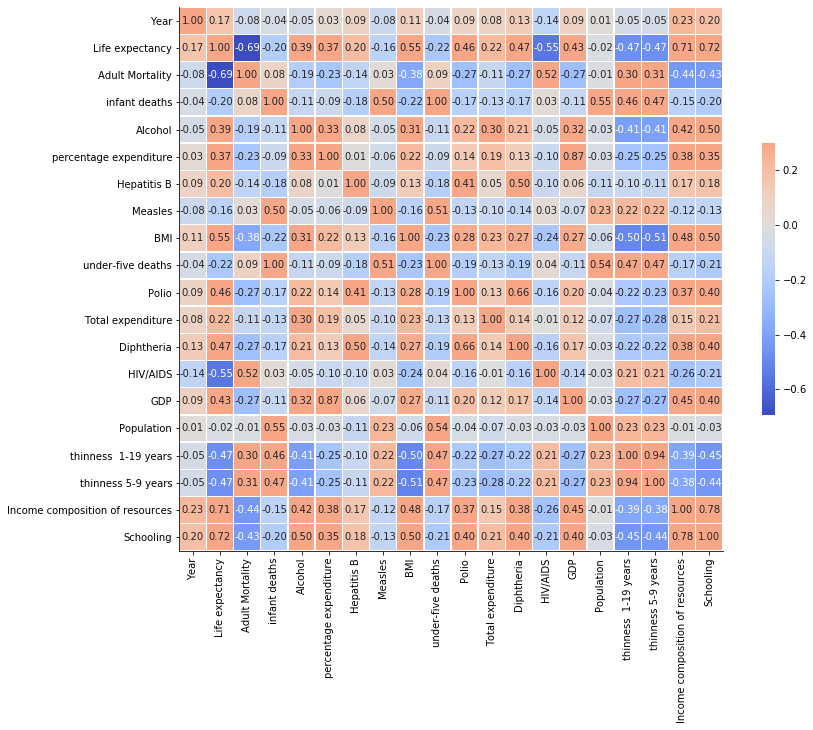

In [34]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
                annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

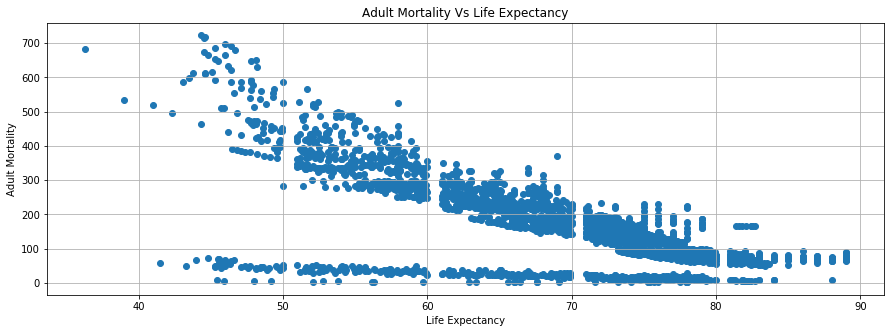

In [150]:
plt.figure(figsize=(15,5))
plt.title("Adult Mortality Vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Adult Mortality")
plt.grid()
plt.scatter(df['Life expectancy'],df['Adult Mortality'])

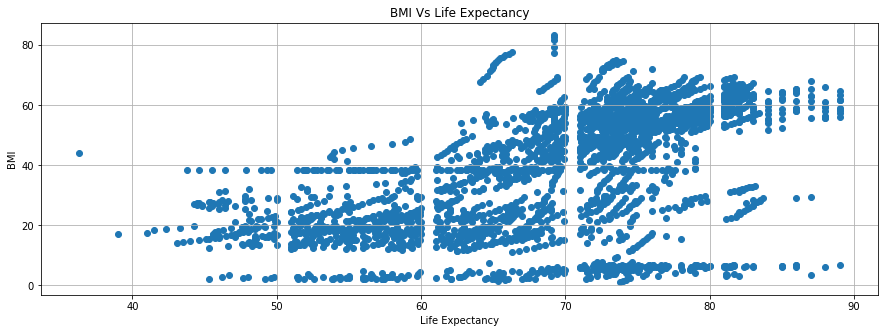

In [149]:
plt.figure(figsize=(15,5))
plt.title("BMI Vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("BMI")
plt.grid()
plt.scatter(df['Life expectancy'],df['BMI'])

### Drop the columns

In [12]:
df.drop(['Country'],inplace=True,axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null float64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null float64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null float64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2938 n

### Categorical column pre processing

In [14]:
df['Status']= df['Status'].map({'Developing':0,'Developed':1}).astype(int)
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,6.0,8.16,65.0,0.100000,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.100000,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.100000,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.100000,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,1.759792,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
cols = pd.get_dummies(df['Year'], prefix= 'Year')
df[cols.columns] = cols
df.drop('Year', axis = 1, inplace = True)
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,0,0,0,0,0,0,0,0,0,1
1,0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,0,0,0,0,0,0,0,0,1,0
2,0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,0,0,0,0,0,0,0,1,0,0
3,0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,0,0,0,0,0,0,1,0,0,0
4,0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,0,0,0,0,0,1,0,0,0,0


### Choosing X and Y 

In [16]:
x = df.drop('Life expectancy',axis=1)
x.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,0,0,0,0,0,0,0,0,0,1
1,0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,0,0,0,0,0,0,0,0,1,0
2,0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,0,0,0,0,0,0,0,1,0,0
3,0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,0,0,0,0,0,0,1,0,0,0
4,0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
y = df['Life expectancy']
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [18]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## kNN Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor
train_score_KNN = []
test_score_KNN = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_KNN.append(knn_reg.score(X_train, y_train))
    test_score_KNN.append(knn_reg.score(X_test, y_test))

Text(0, 0.5, 'Score')

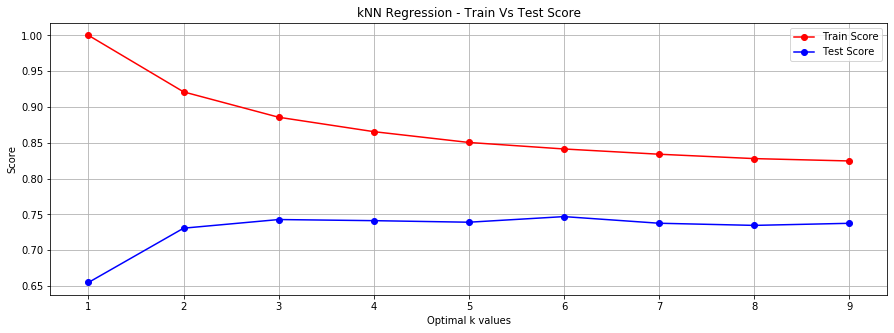

In [59]:
x_axis = range(1,10)
plt.figure(figsize=(15,5))
plt.plot(x_axis, train_score_KNN, c = 'r', label = 'Train Score',marker='o')
plt.plot(x_axis, test_score_KNN, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title("kNN Regression - Train Vs Test Score")
plt.grid()
plt.xlabel('Optimal k values')
plt.ylabel('Score')

In [60]:
knn_reg1 = KNeighborsRegressor(6)
knn_reg1.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_reg1.score(X_train, y_train)))
print('Test score : {:.4f}'.format(knn_reg1.score(X_test, y_test)))

Train score: 0.8413
Test score : 0.7468


## Cross Validation - KNN Regression

In [61]:
from sklearn.model_selection import cross_val_score
cv_train=cross_val_score(knn_reg1, X_train, y_train, cv=5).mean()
cv_test=cross_val_score(knn_reg1, X_test, y_test, cv=5).mean()

print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.7626
Cross Validation Test score : 0.6508


## GridSearch with cross validation - KNN Regression

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':range(2,9)}
knn = GridSearchCV(knn_reg, param_grid, cv=5)
knn.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=9, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(2, 9)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print("Best parameters            :",knn.best_params_)
print("Best cross-validation score: {:.4f}".format(knn.best_score_))

Best parameters            : {'n_neighbors': 6}
Best cross-validation score: 0.7626


In [64]:
knn_best = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)

print('Training score: {:.4f}'.format(knn_best.score(X_train, y_train)))
print('Test score    : {:.4f}'.format(knn_best.score(X_test, y_test)))

Training score: 0.8413
Test score    : 0.7468


In [65]:
y_pred = knn_best.predict(X_test)

print('MAE     : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE    : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_Score: {:.4f}".format(r2_score(y_test, y_pred)))

MAE     : 3.5209
MSE     : 23.0432
RMSE    : 4.8003
r2_Score: 0.7468


## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print('Train score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test score : {:.4f}'.format(lreg.score(X_test, y_test)))

Train score: 0.8224
Test score : 0.8237


## Cross Validation - Linear Regression

In [68]:
from sklearn.model_selection import cross_val_score
cv_train=cross_val_score(lreg, X_train, y_train, cv=5).mean()
cv_test=cross_val_score(lreg, X_test, y_test, cv=5).mean()

print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.8154
Cross Validation Test score : 0.7976


## Ridge Regression

In [69]:
from  sklearn.linear_model import Ridge

x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_ridge = []
test_score_ridge = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_ridge.append(ridge.score(X_train,y_train))
    test_score_ridge.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

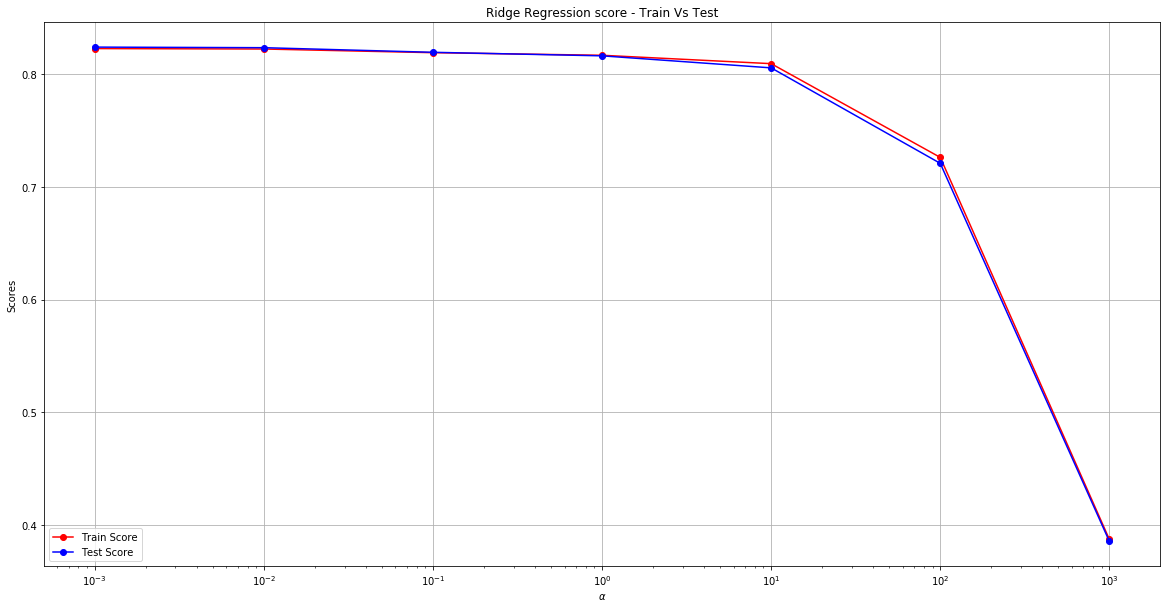

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,10))
plt.plot(x_range, train_score_ridge, c = 'r', label = 'Train Score',marker='o')
plt.plot(x_range, test_score_ridge, c = 'b', label = 'Test Score',marker='o')
plt.xscale('log')
plt.title("Ridge Regression score - Train Vs Test")
plt.ylabel("Scores")
plt.grid()
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [71]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score : {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8224
Test score : 0.8237


In [72]:
coeff_df = pd.DataFrame(ridge.coef_,list(x.columns),columns=["Coeff"])
coeff_df

,Coeff
Status,1.634199
Adult Mortality,-14.241639
infant deaths,140.168124
Alcohol,0.351107
percentage expenditure,1.350291
Hepatitis B,-1.589713
Measles,-5.480427
BMI,3.709396
under-five deaths,-146.755991
Polio,2.998726


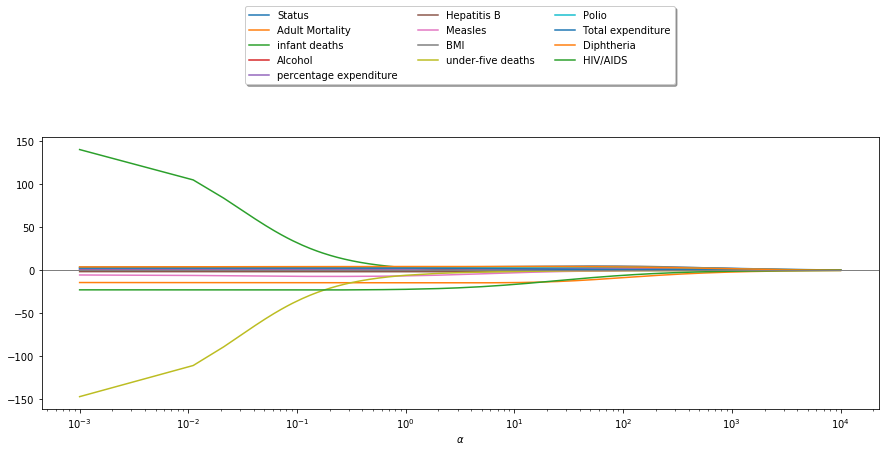

In [73]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = x.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [74]:
ridge.intercept_

68.1165231737435

## Cross-Validation - Ridge

In [75]:
from sklearn.model_selection import cross_val_score
cv_train=cross_val_score(Ridge(alpha ='10'), X_train, y_train, cv=5).mean()
cv_test=cross_val_score(Ridge(alpha ='10'), X_test, y_test, cv=5).mean()

print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.8010
Cross Validation Test score : 0.7547


## GridSearch with cross validation - Ridge

In [76]:
from  sklearn.linear_model import Ridge
param_grid={'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

ridge_reg = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
print("Best cross-validation score: {:.4f}".format(ridge_reg.best_score_))
print("Best parameter             : {}".format(ridge_reg.best_params_))

Best cross-validation score: 0.8154
Best parameter             : {'alpha': 0.001}


In [78]:
ridge_reg_best = Ridge(alpha = 0.001)
ridge_reg_best.fit(X_train,y_train)

print('Train score: {:.4f}'.format(ridge_reg_best.score(X_train, y_train)))
print('Test score : {:.4f}'.format(ridge_reg_best.score(X_test, y_test)))

Train score: 0.8224
Test score : 0.8237


In [79]:
y_pred = ridge_reg_best.predict(X_test)

print('MAE     : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE    : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_Score: {:.4f}".format(r2_score(y_test, y_pred)))

MAE     : 2.9835
MSE     : 16.0474
RMSE    : 4.0059
r2_Score: 0.8237


## Lasso Regression

In [80]:
from sklearn.linear_model import Lasso
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_lasso = []
test_score_lasso = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_lasso.append(lasso.score(X_train,y_train))
    test_score_lasso.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

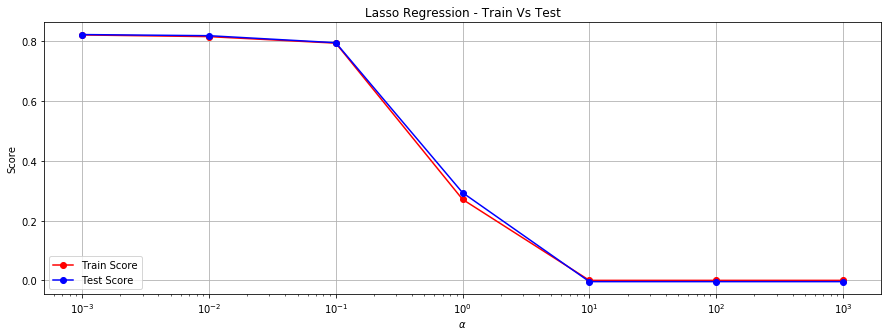

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(x_range, train_score_lasso, c = 'r', label = 'Train Score',marker='o')
plt.plot(x_range, test_score_lasso, c = 'b', label = 'Test Score',marker='o')
plt.xscale('log')
plt.grid()
plt.title("Lasso Regression - Train Vs Test")
plt.ylabel("Score")
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [83]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print ("Train Score: {:.4f}".format(lasso.score(X_train, y_train)))
print ("Test Score : {:.4f}".format(lasso.score(X_test, y_test)))

Train Score: 0.8206
Test Score : 0.8220


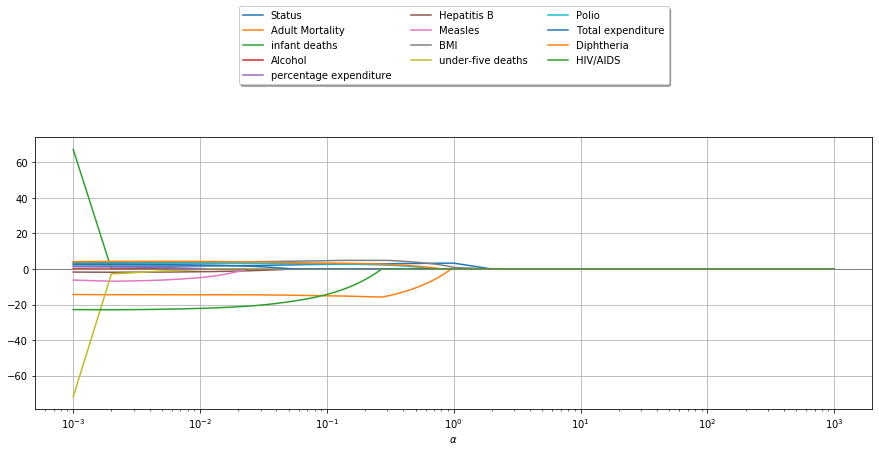

In [84]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = x.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Cross Validation - Lasso

In [85]:
from sklearn.model_selection import cross_val_score
cv_train=cross_val_score(Lasso(alpha =0.001), X_train, y_train, cv=5).mean()
cv_test=cross_val_score(Lasso(alpha =0.001), X_test, y_test, cv=5).mean()

print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.8136
Cross Validation Test score : 0.7967


### Grid Search with cross Validation - Lasso

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1000,100,10,1,0.1,0.01,0.001], 'max_iter': [10000]}
lasso_reg = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                         'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [87]:
print("Best cross-validation score: {:.4f}".format(lasso_reg.best_score_))
print("Best parameter             : {}".format(lasso_reg.best_params_))

Best cross-validation score: 0.8136
Best parameter             : {'alpha': 0.001, 'max_iter': 10000}


In [88]:
lasso_reg_best = Lasso(alpha = 0.001)
lasso_reg_best.fit(X_train,y_train)

print('Training score: {:.4f}'.format(lasso_reg_best.score(X_train, y_train)))
print('Test score    : {:.4f}'.format(lasso_reg_best.score(X_test, y_test)))

Training score: 0.8206
Test score    : 0.8220


In [89]:
y_pred = lasso_reg_best.predict(X_test)

print('MAE     : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE    : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_Score: {:.4f}".format(r2_score(y_test, y_pred)))

MAE     : 2.9948
MSE     : 16.2042
RMSE    : 4.0254
r2_Score: 0.8220


## Polynomial Regression

In [90]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

train_score_poly = []
test_score_poly = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_poly.append(lreg.score(X_train_poly, y_train))
    test_score_poly.append(lreg.score(X_test_poly, y_test))

print(train_score_poly)
print(test_score_poly)

[0.8223941548606393, 0.9420040531026421, 1.0, 1.0]
[0.8237013121044957, 0.4458040791961074, -7.050077507593069, -1.2191294293602266]


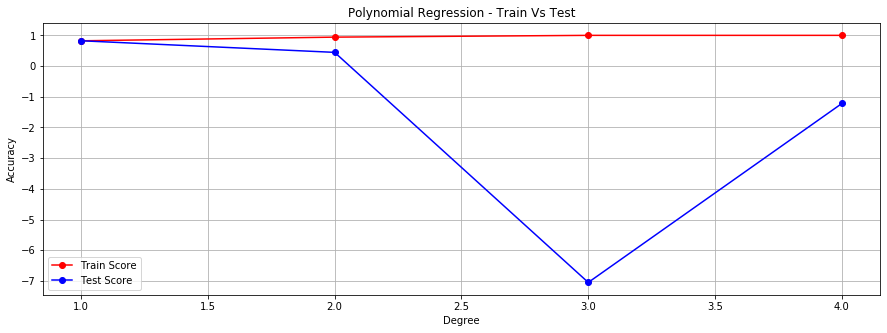

In [92]:
%matplotlib inline

x_axis = range(1,5)
plt.figure(figsize=(15,5))
plt.plot(x_axis, train_score_poly, c = 'r', label = 'Train Score',marker='o')
plt.plot(x_axis, test_score_poly, c = 'b', label = 'Test Score',marker='o')
plt.xlabel('Degree')
#plt.ylim(0,1)
plt.grid()
plt.title('Polynomial Regression - Train Vs Test')
plt.ylabel('Accuracy')
plt.legend()

In [93]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

print ("Train Score: {:.4f}".format(lreg.score(X_train_poly, y_train)))
print ("Test Score : {:.4f}".format(lreg.score(X_test_poly, y_test)))

Train Score: 0.8224
Test Score : 0.8237


### Cross Validation - Polynomial Regression

In [94]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
cv_train=cross_val_score(lreg, X_train_poly, y_train,cv=5).mean()
cv_test=cross_val_score(lreg,X_test_poly, y_test,cv=5).mean()

print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.8154
Cross Validation Test score : 0.7977


## Linear SVM

In [95]:
from sklearn.svm import LinearSVR

c_range = [0.01, 0.1, 1, 10, 100]

train_score_lsvm = []
test_score_lsvm = []

for x in c_range:
    linSVR = LinearSVR(C=x)
    linSVR.fit(X_train,y_train)
    train_score_lsvm.append(linSVR.score(X_train,y_train))
    test_score_lsvm.append(linSVR.score(X_test, y_test))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [96]:
print("Train score : ",train_score_lsvm)
print("\n")
print("Test Score  : ",test_score_lsvm)

Train score :  [-0.006864363915724425, 0.5741196287762037, 0.7964347111930481, 0.8068118054332871, 0.8080316912821569]


Test Score  :  [0.06665063975315133, 0.6020357283950977, 0.7952849507659983, 0.8072291920123147, 0.8089187399385068]


Text(0.5, 0, 'C')

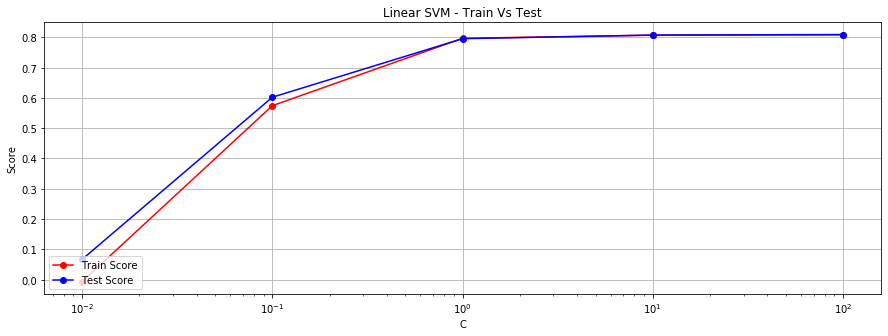

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.grid()
plt.plot(c_range, train_score_lsvm, c = 'r', label = 'Train Score',marker='o')
plt.plot(c_range, test_score_lsvm, c = 'b', label = 'Test Score',marker='o')
plt.title("Linear SVM - Train Vs Test")
plt.ylabel("Score")
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [99]:
linSVR = LinearSVR(C=10)
linSVR.fit(X_train,y_train)

print("Train scores: {:.4f}".format(linSVR.score(X_train, y_train)))
print("Test scores : {:.4f}".format(linSVR.score(X_test, y_test)))

Train scores: 0.8069
Test scores : 0.8072


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Cross Validation - Linear SVM

In [100]:
cv_train=cross_val_score(LinearSVR(C=1), X_train, y_train, cv=5).mean()
cv_test=cross_val_score(LinearSVR(C=1), X_test, y_test, cv=5).mean()
print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.7885
Cross Validation Test score : 0.6792


### Grid Search with Cross Validation - Linear SVM

In [101]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to c

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [102]:
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best parameter             : {}".format(grid_search.best_params_))

Best cross-validation score: 0.8033
Best parameter             : {'C': 100, 'max_iter': 10000}


In [103]:
linSVR_best = LinearSVR(C=100, max_iter= 10000)
linSVR_best.fit(X_train,y_train)

print('Training score: {:.4f}'.format(linSVR_best.score(X_train, y_train)))
print('Test score    : {:.4f}'.format(linSVR_best.score(X_test, y_test)))

Training score: 0.8113
Test score    : 0.8142


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [104]:
y_pred = linSVR_best.predict(X_test)

print('MAE     : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE    : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_Score: {:.4f}".format(r2_score(y_test, y_pred)))

MAE     : 2.9645
MSE     : 16.9109
RMSE    : 4.1123
r2_Score: 0.8142


## SVM: Kernalized Linear Regression

In [105]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

c_range = [0.01, 0.1, 1, 10, 100]

train_score_ksvm = []
test_score_ksvm = []

for x in c_range:
    svr_lin = SVR(kernel='linear', C=x)
    svr_lin.fit(X_train,y_train)
    train_score_ksvm.append(svr_lin.score(X_train,y_train))
    test_score_ksvm.append(svr_lin.score(X_test, y_test))

In [106]:
print("Train Score : ",train_score_ksvm)
print('\n')
print("Test Score  : ",test_score_ksvm)

Train Score :  [0.3730735200770886, 0.7588161758726639, 0.8017157710057599, 0.8059023868326092, 0.8105118370978266]


Test Score  :  [0.3936666740046899, 0.7581303355390411, 0.8025960765176836, 0.8062817266800892, 0.8133024234015133]


Text(0.5, 0, 'C')

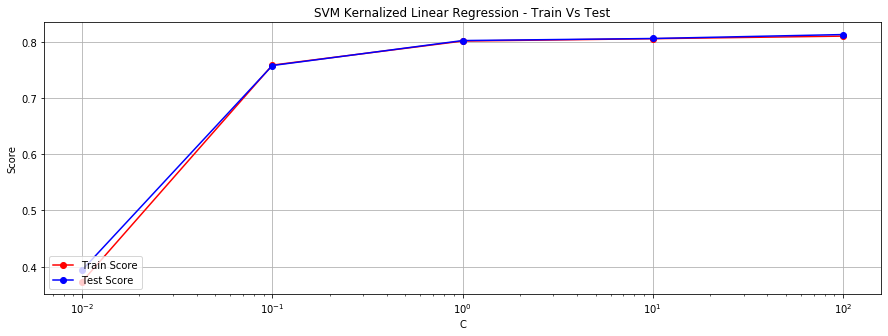

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
#plt.ylim(0.6,0.7)
plt.plot(c_range, train_score_ksvm, c = 'r', label = 'Train Score',marker='o')
plt.plot(c_range, test_score_ksvm, c = 'b', label = 'Test Score',marker='o')
plt.xscale('log')
plt.ylabel("Score")
plt.title("SVM Kernalized Linear Regression - Train Vs Test")
plt.grid()
plt.legend(loc = 3)
plt.xlabel(r'C')

In [108]:
svr_lin = SVR(kernel='linear', C=100)
svr_lin.fit(X_train,y_train)

print("Train scores: {:.4f}".format(svr_lin.score(X_train, y_train)))
print("Test scores : {:.4f}".format(svr_lin.score(X_test, y_test)))

Train scores: 0.8105
Test scores : 0.8133


### Cross Validation - SVR - Linear

In [109]:
cv_train=cross_val_score(SVR(kernel='linear', C=1), X_train, y_train, cv=5).mean()
cv_test=cross_val_score(SVR(kernel='linear', C=1), X_test, y_test, cv=5).mean()
print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.7957
Cross Validation Test score : 0.7732


### Grid Search - SVR - Linear

In [110]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}
svm_linear = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)
svm_linear.fit(X_train, y_train)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [111]:
print("Best cross-validation score: {:.4f}".format(svm_linear.best_score_))
print("Best parameter             : {}".format(svm_linear.best_params_))

Best cross-validation score: 0.8011
Best parameter             : {'C': 100, 'max_iter': 10000}


In [112]:
svm_linear_best = SVR(kernel='linear',C=100, max_iter= 10000)
svm_linear_best.fit(X_train,y_train)

print('Training score: {:.4f}'.format(svm_linear_best.score(X_train, y_train)))
print('Test score    : {:.4f}'.format(svm_linear_best.score(X_test, y_test)))

Training score: 0.8107
Test score    : 0.8153


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [113]:
y_pred = svm_linear_best.predict(X_test)

print('MAE     : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE    : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_Score: {:.4f}".format(r2_score(y_test, y_pred)))

MAE     : 2.9729
MSE     : 16.8094
RMSE    : 4.0999
r2_Score: 0.8153


## SVM: Kernalized RBF Regression

In [114]:
c_range = [0.001,0.01,0.1,1,10,100]
g_range = [0.01,0.1,1,5]
train_score_rbf = []
test_score_rbf = []
index = []
for x in c_range:
    for g in g_range:
        index.append((x,g))
        svr_rbf = SVR(kernel='rbf', C=x, gamma=g, epsilon=.1)
        svr_rbf.fit(X_train,y_train)
        train_score_rbf.append(svr_rbf.score(X_train,y_train))
        test_score_rbf.append(svr_rbf.score(X_test, y_test))

In [115]:
print("Train Score : ",train_score_rbf)
print('\n')
print("Test Score  : ",test_score_rbf)

Train Score :  [-0.08666468585708476, -0.07934027384180142, -0.08273985301633437, -0.08704540373026859, -0.07581287815926485, 0.00030224931937117283, -0.029643793174204847, -0.07917163636455604, 0.03277428606465671, 0.4649976319520939, 0.37096838307346935, 0.0033056021532246183, 0.5294181775207647, 0.794053660789392, 0.8042127244079362, 0.45131774208656683, 0.792274968457359, 0.8482866291788278, 0.9271874168927967, 0.9540677556221457, 0.81557963084896, 0.8993824856403319, 0.9772932115151406, 0.9993796407777633]


Test Score  :  [-0.051342930076615056, -0.04393110805535683, -0.04727210721589614, -0.05185368763153364, -0.04046537589995558, 0.03447767964666504, 0.005105550582261809, -0.04519136979572225, 0.0657894793728554, 0.4821837533398156, 0.3875502455102286, 0.02485464726010944, 0.5433324017003165, 0.7914208602216721, 0.7816626441668882, 0.388882820377306, 0.7914746612780216, 0.8371349186440344, 0.8507853419584472, 0.6718138481667413, 0.8142756952782586, 0.875646895136957, 0.84242455

Text(0.5, 0, 'C and Gamma')

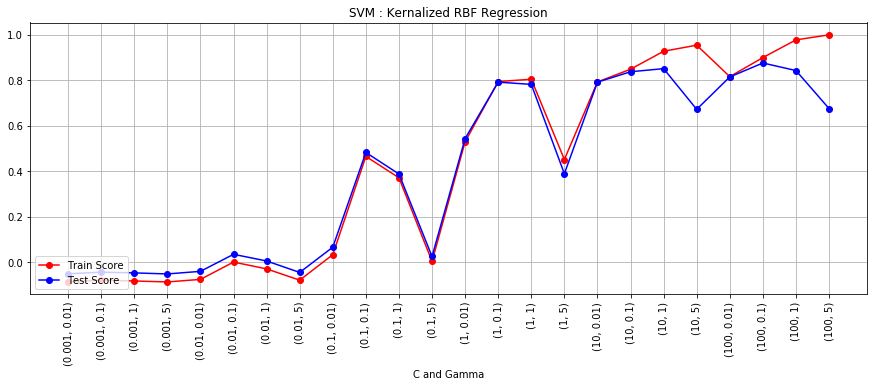

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.title("SVM : Kernalized RBF Regression")
plt.plot(range(len(index)), train_score_rbf, c = 'r', label = 'Train Score',marker='o')
plt.plot(range(len(index)), test_score_rbf, c = 'b', label = 'Test Score',marker='o')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

In [118]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [119]:
print("Train scores: {:.4f}".format(svr_rbf.score(X_train, y_train)))
print("Test scores : {:.4f}".format(svr_rbf.score(X_test, y_test)))

Train scores: 0.8994
Test scores : 0.8756


### Cross Validation  - SVM: Kernalized RBF Regression

In [120]:
cv_train=cross_val_score(SVR(kernel='rbf', C=100,gamma=0.1, epsilon=.1), X_train, y_train, cv=5).mean()
cv_test=cross_val_score(SVR(kernel='rbf', C=100,gamma=0.1, epsilon=.1), X_test, y_test, cv=5).mean()
print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

Cross Validation Train score: 0.8676
Cross Validation Test score : 0.8265


### Grid search with cross validation - SVM: Kernalized RBF Regression

In [121]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.01,0.1,1,5] ,'max_iter':[10000]}
svm_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)

svm_rbf.fit(X_train, y_train)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 5], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [122]:
print("Best cross-validation score: {:.4f}".format(svm_rbf.best_score_))
print("Best parameter             : {}".format(svm_rbf.best_params_))

Best cross-validation score: 0.8676
Best parameter             : {'C': 100, 'gamma': 0.1, 'max_iter': 10000}


In [123]:
svm_rbf_best = SVR(kernel='rbf',C=100, gamma=0.1, max_iter= 10000)
svm_rbf_best.fit(X_train,y_train)

print('Training score: {:.4f}'.format(svm_rbf_best.score(X_train, y_train)))
print('Test score    : {:.4f}'.format(svm_rbf_best.score(X_test, y_test)))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training score: 0.8994
Test score    : 0.8756


In [124]:
y_pred = svm_rbf_best.predict(X_test)

print('MAE     : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE    : {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("r2_Score: {:.4f}".format(r2_score(y_test, y_pred)))

MAE     : 2.3625
MSE     : 11.3192
RMSE    : 3.3644
r2_Score: 0.8756


## SVM: Kernalized Poly Regression

In [125]:
deg_range  = [1,2,3]
coef_range =[1,2,3,4]

train_score_kpoly = []
test_score_kpoly  = []
index=[]

for x in deg_range:
    for c in coef_range:
        index.append((x,c))
        svr_poly = SVR(kernel='poly', C=200, degree=x, epsilon=.1,coef0=c)
        svr_poly.fit(X_train,y_train)
        train_score_kpoly.append(svr_poly.score(X_train,y_train))
        test_score_kpoly.append(svr_poly.score(X_test, y_test))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

In [126]:
print("Train Score :\n",train_score_kpoly)
print("\n")
print("Test Score  :\n",test_score_kpoly)

Train Score :
 [0.805027040926264, 0.8050168876432645, 0.8050168876433167, 0.8050307746514733, 0.8471104513275111, 0.8482867551112082, 0.8488297521727172, 0.8491984434034163, 0.8732455806887798, 0.8874226717505005, 0.8947358624984849, 0.8989887090299687]


Test Score  :
 [0.8053929679039485, 0.8053865508857174, 0.8053865508857717, 0.805376828080027, 0.8376072573698254, 0.8393454091042767, 0.8401028725740143, 0.8406215834221282, 0.8565010781192071, 0.869600211091829, 0.8756481298346133, 0.8799109325476691]


Text(0.5, 0, 'Degree and Coef')

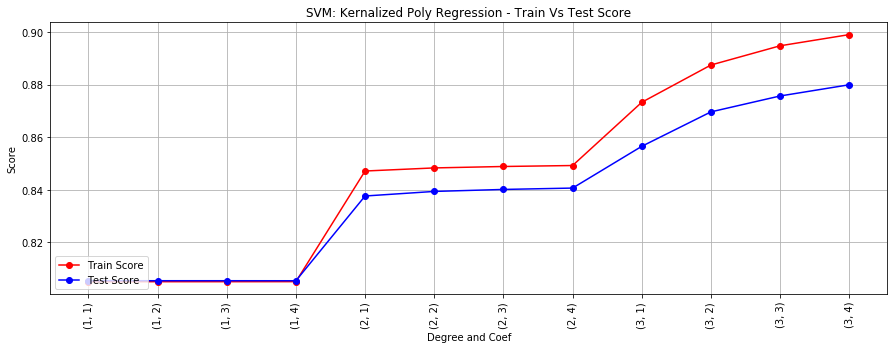

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.title("SVM: Kernalized Poly Regression - Train Vs Test Score")
plt.ylabel("Score")
plt.plot(range(len(index)), train_score_kpoly, c = 'r', label = 'Train Score',marker='o')
plt.plot(range(len(index)), test_score_kpoly, c = 'b', label = 'Test Score',marker='o')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and Coef')

In [130]:
train_poly_score =[]
test_poly_score = []
svr_poly = SVR(kernel='poly', C=200, degree=2, epsilon=.1,coef0=4,max_iter=10000)
svr_poly.fit(X_train,y_train)
train_poly_score.append(svr_poly.score(X_train, y_train))
test_poly_score.append(svr_poly.score(X_test, y_test))
    
print("Train scores: {:.4}".format(svr_poly.score(X_train, y_train)))
print("Test scores : {:.4}".format(svr_poly.score(X_test, y_test)))


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Train scores: 0.8492
Test scores : 0.8408


### Cross validation - SVM Kernalized Poly Regression

In [131]:
cv_train=cross_val_score(SVR(kernel='poly',  C=200, degree=2, epsilon=.1,coef0=4), X_train, y_train, cv=5).mean()
cv_test=cross_val_score(SVR(kernel='poly',  C=200, degree=2, epsilon=.1,coef0=4), X_test, y_test, cv=5).mean()
print('Cross Validation Train score: %.4f'%cv_train)
print('Cross Validation Test score : %.4f'%cv_test)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

Cross Validation Train score: 0.8311
Cross Validation Test score : 0.7998


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

### Gridsearch with Cross-Validation - SVM Kernalized Poly Regression

In [132]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100,200], 'degree': [1,2,3] ,'epsilon':[.1], 'max_iter':[10000]}
svm_poly = GridSearchCV(SVR(kernel='poly'), param_grid, cv=5, return_train_score=True)

svm_poly.fit(X_train, y_train)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anac

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 200], 'degree': [1, 2, 3],
                         'epsilon': [0.1], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [133]:
print("Best cross-validation score: {:.4f}".format(svm_poly.best_score_))
print("Best parameter             : {}".format(svm_poly.best_params_))

Best cross-validation score: 0.7994
Best parameter             : {'C': 200, 'degree': 2, 'epsilon': 0.1, 'max_iter': 10000}


In [134]:
svm_poly_best = SVR(kernel='poly',C=200,degree=2, epsilon=.1,max_iter= 10000,coef0=4)
svm_poly_best.fit(X_train,y_train)

print('Training score: {:.4f}'.format(svm_poly_best.score(X_train, y_train)))
print('Test score    : {:.4f}'.format(svm_poly_best.score(X_test, y_test)))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training score: 0.8492
Test score    : 0.8408


## Decision Tree Regressor

In [22]:
import math
from sklearn.tree import DecisionTreeRegressor
#Fitting the model
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

In [23]:
#Training Score
print('Training Score: ', reg.fit(X_train,y_train).score(X_train,y_train))

Training Score:  1.0


In [24]:
#Evaluating
print('Mean Squared Error(MSE): ',mean_squared_error(y_test,pred))
print('Root-Mean-Squared-Error(RMSE): ',math.sqrt(mean_squared_error(y_test,pred)))
print('Mean-Absolute-Error(MAE): ',mean_absolute_error(y_test,pred))
print('R²: ',r2_score(y_test,pred))

Mean Squared Error(MSE):  8.185655250184427
Root-Mean-Squared-Error(RMSE):  2.861058414325794
Mean-Absolute-Error(MAE):  1.6997867012512442
R²:  0.9100638097139978


### Decision Tree Regressor - Cross validation

In [50]:
### Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kFold = KFold(n_splits=5)
score = cross_validate(reg, X_train, y_train, cv=kFold, scoring='r2', return_train_score= True)
print(score)

{'fit_time': array([0.0259552 , 0.02390885, 0.02197051, 0.0249474 , 0.02196527]), 'score_time': array([0.        , 0.00099802, 0.00100899, 0.00099897, 0.00098968]), 'test_score': array([0.90311422, 0.91269224, 0.91149019, 0.90382473, 0.91152091]), 'train_score': array([1., 1., 1., 1., 1.])}


In [51]:
print('CV Average Train Score: ',score['train_score'].mean())
print('CV Average Test Score: ',score['test_score'].mean())

CV Average Train Score:  1.0
CV Average Test Score:  0.9085284582374461


### Decision Tree Regressor - Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV 
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid = GridSearchCV(reg, param_grid, refit = True, verbose = 1, n_jobs = -1) 
grid.fit(X_train, y_train)

grid.best_params_


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:    9.2s finished


{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [55]:
pred = grid.predict(X_test)

In [56]:
print('Mean Squared Error(MSE): ',mean_squared_error(y_test,pred))
print('Root-Mean-Squared-Error(RMSE): ',math.sqrt(mean_squared_error(y_test,pred)))
print('Mean-Absolute-Error(MAE): ',mean_absolute_error(y_test,pred))
print('R²: ',r2_score(y_test,pred))

Mean Squared Error(MSE):  7.923095904802035
Root-Mean-Squared-Error(RMSE):  2.814799443086849
Mean-Absolute-Error(MAE):  1.9456777264531704
R²:  0.9129485619453048


## Model Performance

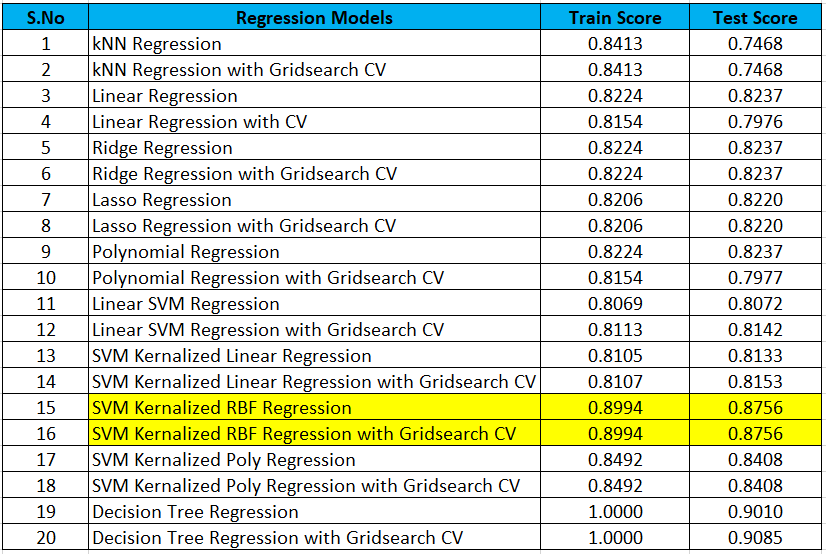

In [1]:
from IPython.display import Image
Image(filename = r"ModelComparision.png", width = 500, height = 300)

## Conclusion

After running multiple models for the given dataset, we have concluded that the below model with the specified parameters will give us best result for regression task in predicting the value of the target variable 'Life expectancy'

Model : SVM Kernalized RBF Regression with/without Gridsearch Cross-Validation

Best parameter : {'C': 100, 'gamma': 0.1, 'max_iter': 10000}

Train score on best parameters of SVM Kernalized RBF Regression : 0.8994

Test score on best parameters SVM Kernalized RBF Regression : 0.8756